In [26]:
import json

with open('/content/igredientes_separados.json', 'r') as f:
    data = json.load(f)

In [40]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [34]:
def criar_grafo(data):
    G = nx.Graph()
    ingrediente_tipo = {}

    # Preencher o dicionário e adicionar nós ao grafo
    for receita_nome, categorias in data.items():
        for tipo, ingredientes in categorias.items():
            for ingrediente in ingredientes:
                if ingrediente not in ingrediente_tipo:
                    ingrediente_tipo[ingrediente] = tipo
                    # Adicionar nó com o atributo 'tipo'
                    G.add_node(ingrediente, tipo=tipo)

    # Para cada receita, conectar todos os ingredientes entre si
    for receita_nome, categorias in data.items():
        # Obter todos os ingredientes desta receita
        ingredientes_da_receita = []
        for ingredientes in categorias.values():
            ingredientes_da_receita.extend(ingredientes)

        # Conectar todos os ingredientes entre si
        for i in range(len(ingredientes_da_receita)):
            for j in range(i + 1, len(ingredientes_da_receita)):
                ingrediente1 = ingredientes_da_receita[i]
                ingrediente2 = ingredientes_da_receita[j]

                # Verifica se a aresta já existe
                if G.has_edge(ingrediente1, ingrediente2):
                    # Se existe, incrementa o peso
                    G[ingrediente1][ingrediente2]['weight'] += 1
                else:
                    # Se não existe, cria com peso 1
                    G.add_edge(ingrediente1, ingrediente2, weight=1)

    return G, ingrediente_tipo

In [35]:
G, ingrediente_tipo = criar_grafo(data)

In [36]:
coeficiente = nx.attribute_assortativity_coefficient(G, 'tipo')
print(f"Coeficiente de assortatividade ponderado: {coeficiente:.4f}")

Coeficiente de assortatividade ponderado: -0.0524


In [49]:
def visualizar_grafo_por_tipo(G, titulo="Grafo de Ingredientes da Culinária Brasileira",
                             salvar_em=None, tamanho=(12, 10)):

    # Fechar figuras anteriores corretamente
    plt.close()

    # Criar nova figura e eixo
    fig, ax = plt.subplots(figsize=tamanho)

    # Obter todos os tipos únicos de ingredientes
    tipos = nx.get_node_attributes(G, 'tipo')
    tipos_unicos = sorted(set(tipos.values()))

    # Criar mapa de cores
    cores = plt.cm.tab10.colors  # Paleta de cores
    mapa_cores = {tipo: cores[i % len(cores)] for i, tipo in enumerate(tipos_unicos)}

    # Definir cores dos nós
    node_colors = [mapa_cores.get(tipos.get(node, 'Desconhecido'), (0.5, 0.5, 0.5)) for node in G.nodes()]

    # Tamanho dos nós proporcional ao grau
    node_sizes = [30 + (G.degree(node) * 5) for node in G.nodes()]

    # Layout do grafo
    pos = nx.spring_layout(G, k=0.3, seed=42, weight='weight')

    # Desenhar arestas
    nx.draw_networkx_edges(G, pos, ax=ax, alpha=0.2, width=0.6)

    # Desenhar nós
    nx.draw_networkx_nodes(G, pos, ax=ax, node_color=node_colors, node_size=node_sizes, alpha=0.8)

    # Rótulos apenas para os nós mais conectados
    ingredientes_importantes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:15]
    nodes_importantes = [node for node, _ in ingredientes_importantes]
    labels = {node: node for node in nodes_importantes}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=9, font_weight='bold', ax=ax)

    # Legenda
    patches = [plt.Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=cor, markersize=10, label=tipo)
               for tipo, cor in mapa_cores.items()]
    ax.legend(handles=patches, title='Tipo de Ingrediente', loc='upper right')

    # Título e ajuste final
    ax.set_title(titulo, fontsize=16)
    ax.axis('off')
    plt.tight_layout()

    # Salvar imagem se caminho for especificado
    if salvar_em:
        plt.savefig(salvar_em, dpi=300, bbox_inches='tight')
        print(f"Figura salva em: {salvar_em}")

    plt.show()


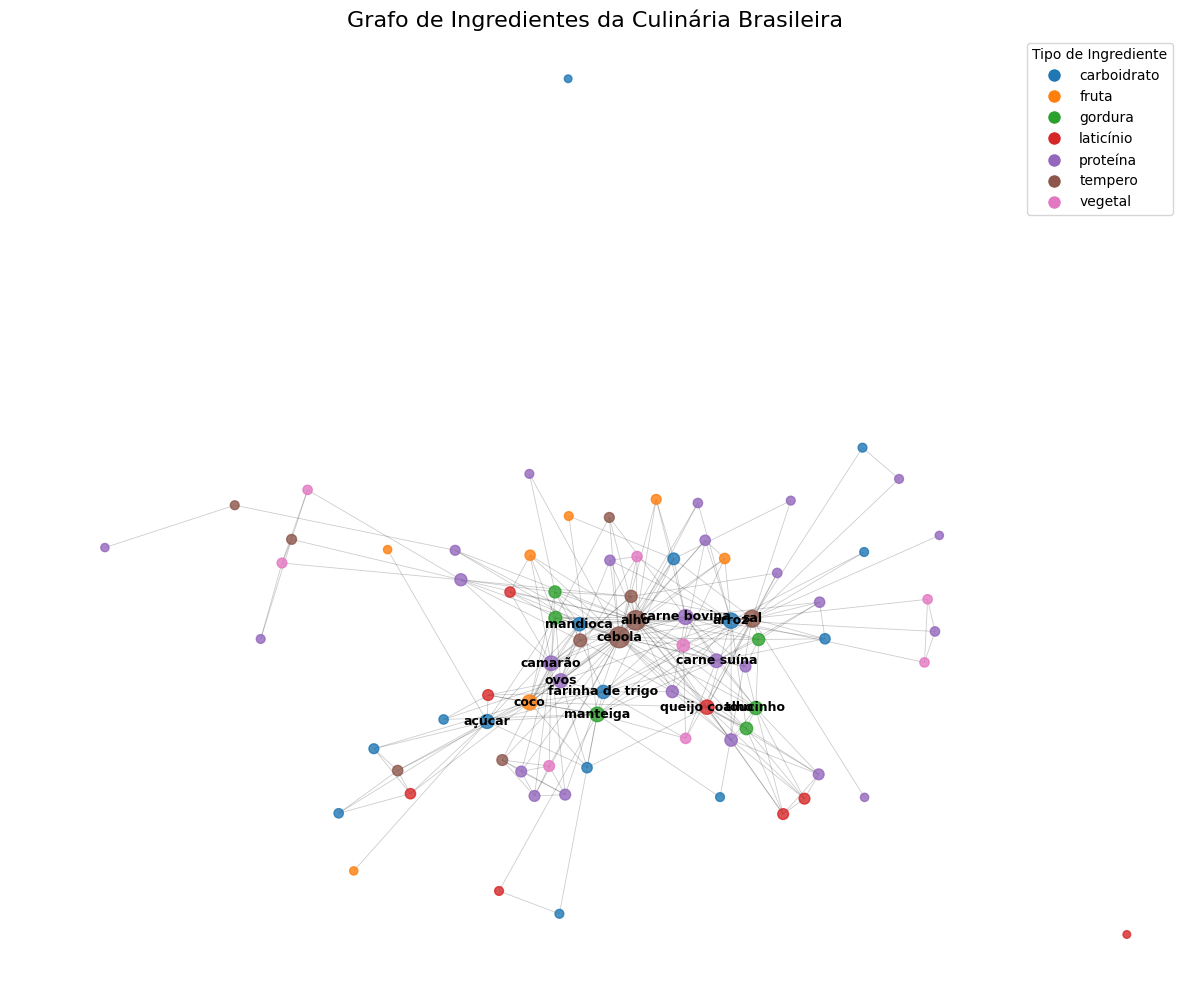

In [50]:
visualizar_grafo_por_tipo(G, "Grafo de Ingredientes da Culinária Brasileira", salvar_em=None, tamanho=(12, 10))